# Capstone 2 - Diabetes Patients’ Readmission Prediction

### Exploratory Data Analysis

Code written by: Rayees Ahamed

**Steps**:

1. Explore remaining variables and clean them
2. Extract neccessary info and store them in separate dataframes
3. Relate each column with others and see if there any relation
4. Start plotting the variables and visualize them (refer DS1/other model DS2)
5. Scaling the data to higher dimension > scaled_df
6. Verifying the scaling (mean/sd/others)
7. Calculate the PCA transformation (see why it is required then apply)
8. Feature engineering - new features from existing featcolumns (e.g. column1 / column2)
9. Feature correlation (heatmaps, boxplots)
10. Check the new features and find if any relation with other variables (scatterplots, pairplot, regplot etc.)
11. Save data & summary

### Importing packages

In [26]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

%matplotlib inline

### Loading data

In [27]:
# Reading the cleaned csv data from data wrangling
d_data = pd.read_csv('data/d_data_cleaned.csv')

### Exploring the data

In [28]:
d_data.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10],6,25,1,1,?,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20],1,1,7,3,?,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30],1,1,7,2,?,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40],1,1,7,2,?,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50],1,1,7,1,?,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


**Revisiting all the features once again**

In [29]:
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   admission_type_id         101763 non-null  int64 
 6   discharge_disposition_id  101763 non-null  int64 
 7   admission_source_id       101763 non-null  int64 
 8   time_in_hospital          101763 non-null  int64 
 9   payer_code                101763 non-null  object
 10  medical_specialty         101763 non-null  object
 11  num_lab_procedures        101763 non-null  int64 
 12  num_procedures            101763 non-null  int64 
 13  num_medications           101763 non-null  int64 
 14  numb

**Features of importance:**

* Encounter ID - captures each encounter
* Race, Gender, Age - to see the imbalance of the data
* Weight - variable to relate with OBESITY > DIABETES > RISK > RE-ADMISSION
* Admission type - key to look on emergency or regular visit
* **Time in hospital** - defines how many days in hospital is bad for patient, or whether short time stayed patient left early?
* Medical speciality - not sure how it helps - but explore this variable to see any useful info
* Number of lab tests - more tests may say patient have more complications?
* Number of procedures - not clear whether it is some treatment or surgery or others - but give a glimpse
* **Number of medications** - important to analyse: a) No. of medicines given, b) Medicines given to admitted & redmitted patients, 3) Any effect of medicines that reduced the admission frequency in any group of patients?
* **Glucose serum test** - incates the normal & high glucose levels
* Alc test result - gives glycalated hemoglobin levels, confirms the person is normal or diabetic
* Change of medications - any changes in medication resulted in no readmission
* Diabtes medications prescribed - find out medications prescribed helped in no admission
* **Readmitted** - dependent or predictive variable for our study

### Exploring variables - race, gender

We can see distribution of people from different races surveyed here. Also, the men and women distribution in the data.

**Race**

In [30]:
# Checking race column
d_data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

We can see '?' mentioned as a race, that can be combined into 'Other', since we do not know what race it is.

In [31]:
# Converting '?' into 'Other'
d_data['race'] = d_data['race'].str.replace('?', 'Other')

<ipython-input-31-454eb054ad8f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  d_data['race'] = d_data['race'].str.replace('?', 'Other')


In [32]:
# Checking race column again
d_data.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
Other               3776
Hispanic            2037
Asian                641
Name: race, dtype: int64

Now '?' marked entries merged with 'Other' column. Lookign at the result, most of the patients were 'Caucasian', we can check this in terms of percentage.

In [33]:
# Calculating percentage of each race
d_data.race.value_counts() / len(d_data.race) * 100

Caucasian          74.780618
AfricanAmerican    18.877195
Other               3.710582
Hispanic            2.001710
Asian               0.629895
Name: race, dtype: float64

Around 74% of the surveyed patients were 'Caucasian', secondly 18% patients are 'AfricanAmerican'. 'Asian' are the lowest in the list. 

**Gender**

Checking the gender column to see the men and women distribution

In [34]:
# Checking gender column in terms of percentage
d_data['gender'].value_counts() / len(d_data.gender) * 100

Female    53.760208
Male      46.239792
Name: gender, dtype: float64

This is roughly a good split. Because both men and women entries share around 50% each. So, thee is no imbalance of one gender. We can actually see who is more prone to get redmitted: Men? or Women?

## Do all of them are diabetic?

Before we investigate further, do all the people in the data really have diabetes? Because, there is a chance other people also visited hospital, but they may not have diabetes. So including normal people and going ahead with analysis may create bias in our study. 

To confirm each patient have diabetes or not, we can use the 'Diabetes Medications' column to check, whether doctor prescribed diabetes medicines to the patient or not.
* If - 'Yes' - they are Diabetic
* If - 'No' - They are Normal 

In [35]:
# Checking 'diabetesMed' column
d_data['diabetesMed'].value_counts()

Yes    78361
No     23402
Name: diabetesMed, dtype: int64

We can see 23402 people did not prescribed with diabetes medication. So, if we are predicting the diabetes readmission, including people who do not have diabetes will not make any sense. So, we can create a separate dataframe with only diabetes people.

In [36]:
# Creating new dataframe with only diabetes people
Diabetes = d_data[d_data['diabetesMed']=='Yes']
Diabetes.shape

(78361, 49)

Now we have only diabetes people data, we can focus on other columns and check the distribution of 'readmitted' people.
This will help to identify any attributes caused more people to readmit within 30 days.

**Columns to check:**
* Number of lab procedures
* Number of procedures (other than lab procedures)
* Number of medications
* Change of medications

**Number of lab procedures**

Does more lab tests performed on the readmitted people? Let's check

In [37]:
# Grouping the lab procedure rows by readmitted column
Diabetes.groupby('readmitted')['num_lab_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,44.371309,19.404812,1.0,33.0,45.0,58.0,132.0
>30,28318.0,44.063281,19.653414,1.0,33.0,45.0,58.0,113.0
NO,40932.0,42.824270,20.025009,1.0,31.0,44.0,57.0,121.0


The mean value of all shows between 42 to 44 tests per patient. 

That says both admitted and not admitted patients undergone same number of tests. This column may not be useful.

**Number of procedures (other than lab tests)**

Does this column help for analysis?

In [38]:
Diabetes.groupby('readmitted')['num_procedures'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,1.292065,1.663643,0.0,0.0,1.0,2.0,6.0
>30,28318.0,1.231867,1.666595,0.0,0.0,1.0,2.0,6.0
NO,40932.0,1.412684,1.755755,0.0,0.0,1.0,2.0,6.0


The mean value shows approx. 1 procedure per patient performed in both readmitted and not readmitted group. So this column also not useful.

**Number of medications**

Checking the number of medications column. Do particular group taken more medications?

In [39]:
Diabetes.groupby('readmitted')['num_medications'].describe()

,count,mean,std,min,25%,50%,75%,max
readmitted,,,,,,,,
<30,9111.0,17.585117,8.201508,2.0,12.0,16.0,22.0,81.0
>30,28318.0,16.935341,7.643038,1.0,12.0,16.0,21.0,70.0
NO,40932.0,16.630973,8.641586,1.0,11.0,15.0,21.0,79.0


The total number of medications taken by both group lies very close around 16-17 medicines per patient. So this column will not help.

But it will be important to see what medicines each patient taken or not taken. That may be helpful. Let's check that.

**Change of medications**

Before investigating each medicine, let's see whether doctor suggested to change medication that helped particular group.

In [40]:
# Checking 'change' column
Diabetes['change'].value_counts()

Ch    47009
No    31352
Name: change, dtype: int64

'Ch' refers the change of medication here. Let's change it as 'Yes' for easy understanding.

In [41]:
# Replacing 'Ch' into 'Yes' in change column
Diabetes['change'] = Diabetes['change'].str.replace('Ch', 'Yes')

<ipython-input-41-68716b16d25b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Diabetes['change'] = Diabetes['change'].str.replace('Ch', 'Yes')


In [42]:
# Now checking the change column in terms of percentage
Diabetes['change'].value_counts() / len(Diabetes.change) * 100

Yes    59.990301
No     40.009699
Name: change, dtype: float64

Over 60% of the diabetes people asked to change medication. Did this helped them to not get readmitted?

We can check how many got change of medication between readmitted and not readmitted.

In [43]:
# Splitting admitted and non admitted patients data into two datframes to understand better
no_admission = Diabetes[Diabetes['readmitted']=='NO']
readmitted = Diabetes[Diabetes['readmitted']!='NO']

In [44]:
# Change of medication - in not admitted people
no_admission['change'].value_counts() / len(no_admission.change) * 100

Yes    59.071142
No     40.928858
Name: change, dtype: float64

In [45]:
# Change of medication - in readmitted people
readmitted['change'].value_counts() / len(readmitted.change) * 100

Yes    60.995485
No     39.004515
Name: change, dtype: float64

* 59% of the not admitted patients given change in medication
* 61% of the readmitted patients also given change in medication.

So, there is no great difference, but let's explore what medicines given to each group. That may tell some story.

### Diabetes medications - does this help patients not to get readmitted?

Our data contains 24 different medicines as features - each categorized into four answers.
* Up - medicine prescribed, but to increase in dose
* Down - medicine prescribed, but to decrease in dose
* Steady - medicine prescribed, but no change in dose
* No - medicine not prescribed

We can see the relationship between what medicines readmitted people taken and what they did not take. This will help to identify the right medicines which can help them to avoid getting readmitted.

In [46]:
# Calling info to check the medicines in the columns
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78361 entries, 1 to 101761
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              78361 non-null  int64 
 1   patient_nbr               78361 non-null  int64 
 2   race                      78361 non-null  object
 3   gender                    78361 non-null  object
 4   age                       78361 non-null  object
 5   admission_type_id         78361 non-null  int64 
 6   discharge_disposition_id  78361 non-null  int64 
 7   admission_source_id       78361 non-null  int64 
 8   time_in_hospital          78361 non-null  int64 
 9   payer_code                78361 non-null  object
 10  medical_specialty         78361 non-null  object
 11  num_lab_procedures        78361 non-null  int64 
 12  num_procedures            78361 non-null  int64 
 13  num_medications           78361 non-null  int64 
 14  number_outpatient    

Column 23 to 45 are the medicines prescribed to the patients. Let's check them and see how many patients are prescribed with that.

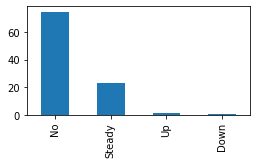

In [47]:
# Let's check the first medicine precribed to the see the distribution
plt.figure(figsize=(4,2))
(Diabetes['metformin'].value_counts() / len(Diabetes['metformin']) * 100).plot(kind='bar')
plt.show()

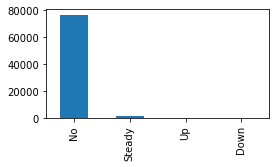

In [48]:
# Let's check the second medicine 
plt.figure(figsize=(4,2))
Diabetes['repaglinide'].value_counts().plot(kind='bar')
plt.show()

Let's visualize all of the medicines and check the count of each prescription.

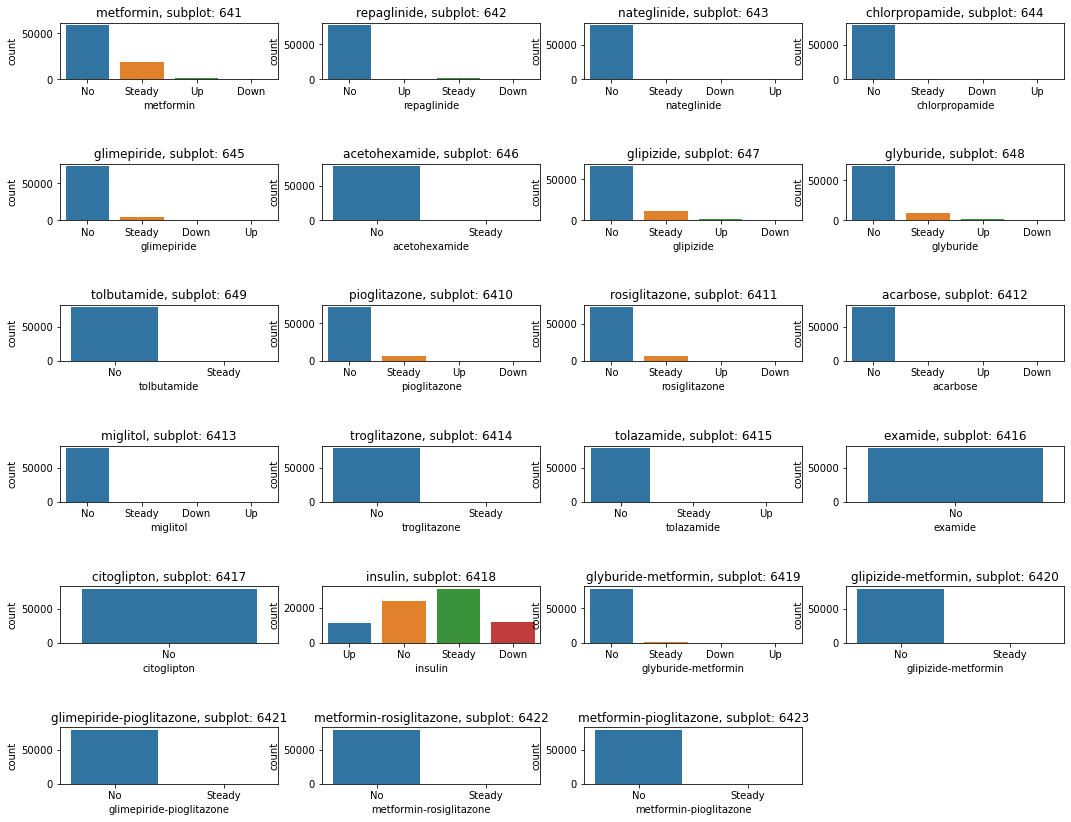

In [49]:
# Creating bar plot to visualize all the medicines and their prescription

# Listing all the medicines in variable 'med_columns'
med_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']

# Parameters 
a = 6  # nrows
b = 4  # ncolumns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(18,14))

for i in med_columns:
    plt.subplot(a,b,c)   
    plt.title('{}, subplot: {}{}{}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.countplot(x=i, data=Diabetes)
    plt.subplots_adjust(hspace=1.5)
    c = c+1
plt.show()

From bar plots we can see, all the medicines has large group of people who were not prescribed. But some medicines has significant change in their prescription. We can identify below medicines may be helpful for further investigation.
* Insulin
* Metformin
* Glimepiride
* Glipizide
* Glyburide
* Pioglitazone
* Rosiglitazone

But we can gain some more information from these plots by cleaning a bit in two ways:
* By visualizing through a grouped bar chart to see how data is split between readmitted vs not readmitted
* Excluding the 'No' category, since medicine was not prescribed and visualizing only prescribed population
* Visualizing the same in terms of percentages